Write a program that creates three new variables/columns called “day”, “hour”, and “period”, from the “date_time” column. These should respectively include, the day, hour, and period in which the store sensors captured the number of customers.

In [ ]:
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
#Read the excel file as data frame
df = pd.read_excel('Customers.xlsx')


In [ ]:
# Read the data into a pandas DataFrame

# Create the day column
df["day"] = df["date_time"].dt.day_name()

# Create the hour column
df["hour"] = df["date_time"].dt.hour

# Create the period column
df["period"] = pd.cut(df["hour"], bins=[0,12,24], labels=["AM","PM"], right=False)

# Print the updated DataFrame
print(df)

             date_time  No_of_customers        day  hour period
0  2023-01-01 12:04:34              123     Sunday    12     PM
1  2023-01-02 12:30:36              126     Monday    12     PM
2  2023-01-03 13:04:39              148    Tuesday    13     PM
3  2023-01-04 13:30:36              170  Wednesday    13     PM
4  2023-01-05 14:03:38              189   Thursday    14     PM
5  2023-01-06 14:30:35              205     Friday    14     PM
6  2023-01-07 14:57:41              208   Saturday    14     PM
7  2023-01-08 15:30:39              209     Sunday    15     PM
8  2023-01-09 16:04:39              191     Monday    16     PM
9  2023-01-10 16:30:42              180    Tuesday    16     PM
10 2023-01-11 08:04:40              155  Wednesday     8     AM
11 2023-01-12 08:30:45              133   Thursday     8     AM
12 2023-01-13 09:04:46               54     Friday     9     AM
13 2023-01-14 09:30:45               63   Saturday     9     AM
14 2023-01-15 09:57:41               65 

In [ ]:
# Additionally we're Converting back to .xlsx file
file_name="result.xlsx"
df.to_excel(file_name)
#Converted file will be available in the name of Results.xlsx

Explore the data numerically (using appropriate statistical measures with Pandas) and visually (using appropriate visualization plots with Seaborn) to understand customer shopping patterns, i.e., how the number of customers is related to the day of the week, the hour of the day, and the time period. Interprett obtained numerical and visual insights.

In [ ]:
# Explore the data numerically:
# 1.Number of customers per day:
df.groupby("day")["No_of_customers"].sum()


day
Friday       545
Monday       680
Saturday     559
Sunday       698
Thursday     620
Tuesday      592
Wednesday    599
Name: No_of_customers, dtype: int64

In [ ]:
# Average number of customers per hour:
df.groupby("hour")["No_of_customers"].mean()

hour
8     133.000000
9      60.666667
10     73.000000
11    116.333333
12    132.666667
13    162.000000
14    190.000000
15    174.666667
16    159.250000
Name: No_of_customers, dtype: float64

In [ ]:
# Average number of customers per period:

df.groupby("period")["No_of_customers"].mean()

period
AM    103.272727
PM    166.157895
Name: No_of_customers, dtype: float64

In [ ]:
df.head(10)

,date_time,No_of_customers,day,hour,period
0,2023-01-01 12:04:34,123,Sunday,12,PM
1,2023-01-02 12:30:36,126,Monday,12,PM
2,2023-01-03 13:04:39,148,Tuesday,13,PM
3,2023-01-04 13:30:36,170,Wednesday,13,PM
4,2023-01-05 14:03:38,189,Thursday,14,PM
5,2023-01-06 14:30:35,205,Friday,14,PM
6,2023-01-07 14:57:41,208,Saturday,14,PM
7,2023-01-08 15:30:39,209,Sunday,15,PM
8,2023-01-09 16:04:39,191,Monday,16,PM
9,2023-01-10 16:30:42,180,Tuesday,16,PM


<module 'seaborn' from 'C:\\Users\\omen\\anaconda3\\Lib\\site-packages\\seaborn\\__init__.py'>


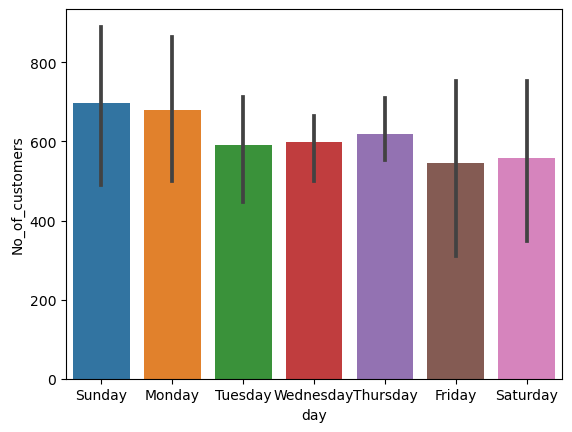

In [ ]:
# Number of customers per day:
from matplotlib import pyplot as plt
import seaborn as sns
print(sns)
sns.barplot(x="day", y="No_of_customers", data=df, estimator=sum)
plt.show()

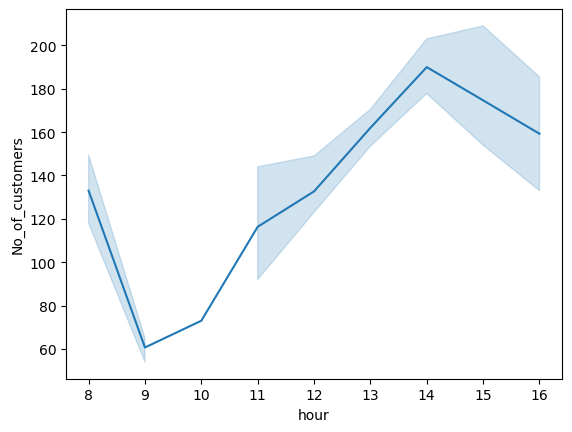

In [ ]:
sns.lineplot(x="hour", y="No_of_customers", data=df, estimator="mean")
plt.show()

<Figure size 600x600 with 0 Axes>

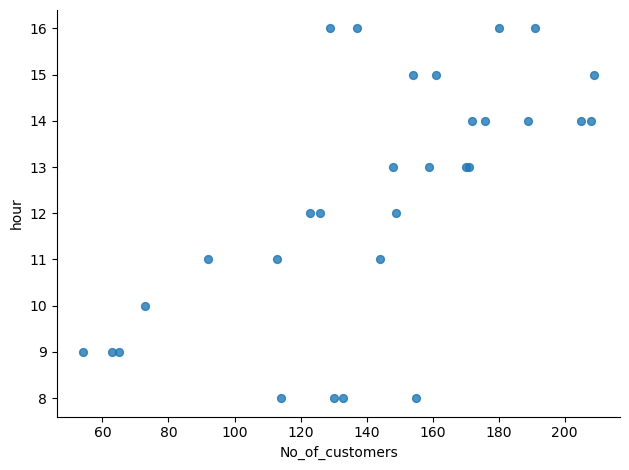

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(6, 6))
df.plot(kind='scatter', x='No_of_customers', y='hour', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.tight_layout()

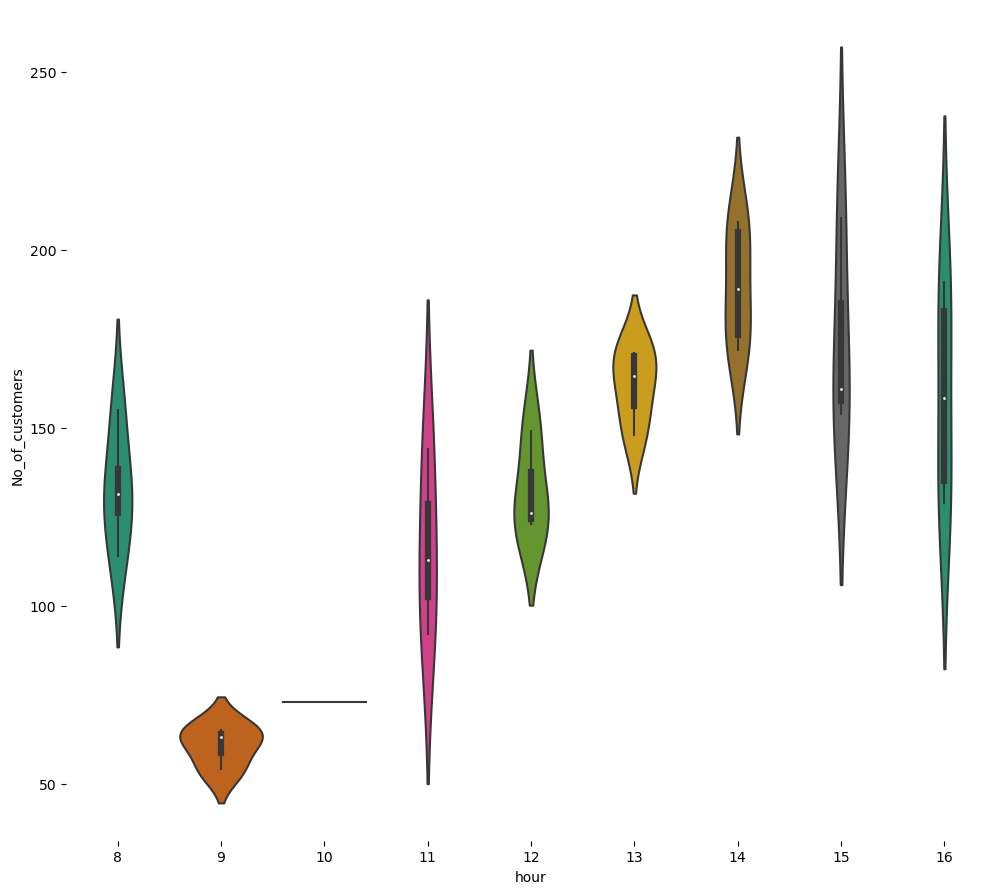

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['hour'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, y='No_of_customers', x='hour', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

C:\Users\omen\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(4.944444444444445, 0.5, 'Number of Customers')

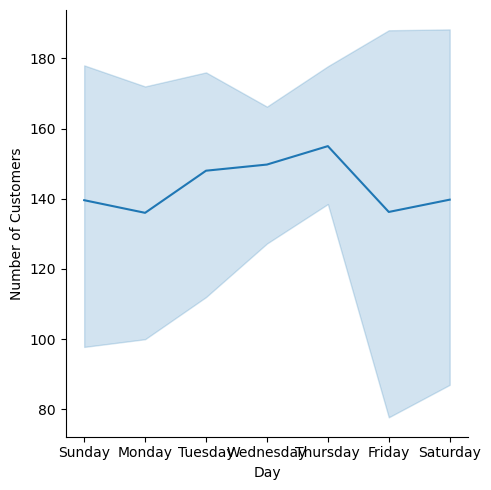

In [ ]:
sns.relplot(x='day', y='No_of_customers', kind="line",  data=df);
plt.xlabel("Day"); plt.ylabel("Number of Customers")

C:\Users\omen\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(4.944444444444445, 0.5, 'Number of Customers')

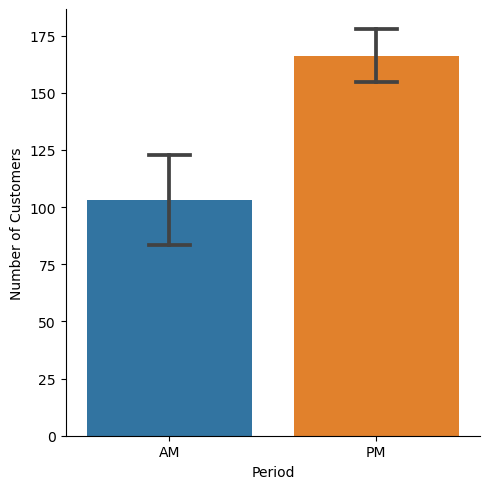

In [ ]:
# creating a bar plot: 'clinders' vs 'mpg'
sns.catplot(x='period', y = 'No_of_customers',  data=df, kind='bar', capsize=.2);
plt.xlabel("Period"); plt.ylabel("Number of Customers")